In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(preds_val, val_y)
    return mae

In [24]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
df = pd.read_csv("E:/Projects/Learning/ML/Melbourne Housing Data/melb_data.csv")
df.dropna(axis=0, inplace=True)
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', "Longtitude", 'BuildingArea']
new_features = []
y = df['Price'].reset_index(drop=True)
X = df[melbourne_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.1)

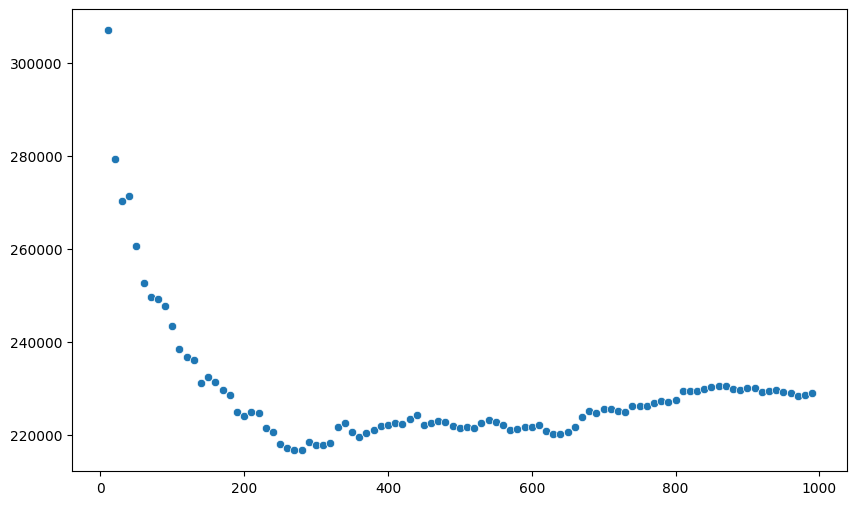

In [22]:
mae_by_depth = {}
for i in range(10, 1000, 10):
    my_mae = get_mae(i, train_X, val_X, train_y, val_y)
    mae_by_depth[i] = my_mae

plt.figure(figsize=(10, 6))
sns.scatterplot(x=mae_by_depth.keys(), y=mae_by_depth.values())
plt.show()